In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
#dataset
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv",header= None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       614 non-null    object 
 1   1       601 non-null    object 
 2   2       611 non-null    object 
 3   3       599 non-null    object 
 4   4       614 non-null    object 
 5   5       582 non-null    object 
 6   6       614 non-null    int64  
 7   7       614 non-null    float64
 8   8       592 non-null    float64
 9   9       600 non-null    float64
 10  10      564 non-null    float64
 11  11      614 non-null    object 
 12  12      614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.columns = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
print('No of Rows:',df.shape[0])
print('No. of Columns:',df.shape[1])
df.head()

No of Rows: 614
No. of Columns: 13


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.duplicated().sum()

0

There are no duplicate values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<Axes: >

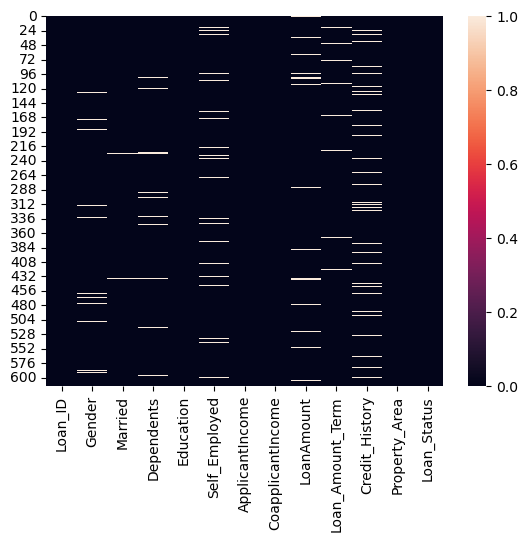

In [10]:
sns.heatmap(df.isnull())

In [11]:
# find missing values
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Credit_History                 50        8.143322
Self_Employed                  32        5.211726
LoanAmount                     22        3.583062
Dependents                     15        2.442997
Loan_Amount_Term               14        2.280130
Gender                         13        2.117264
Married                         3        0.488599
Loan_ID                         0        0.000000
Education                       0        0.000000
ApplicantIncome                 0        0.000000
CoapplicantIncome               0        0.000000
Property_Area                   0        0.000000
Loan_Status                     0        0.000000


In [12]:
# categorical values in columns bifucation
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Gender
Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Loan_Amount_Term
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
Property_Area
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Credit_History
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
Loan_Status
Loan_Status
Y    422
N    192
Name: count, dtype: int64


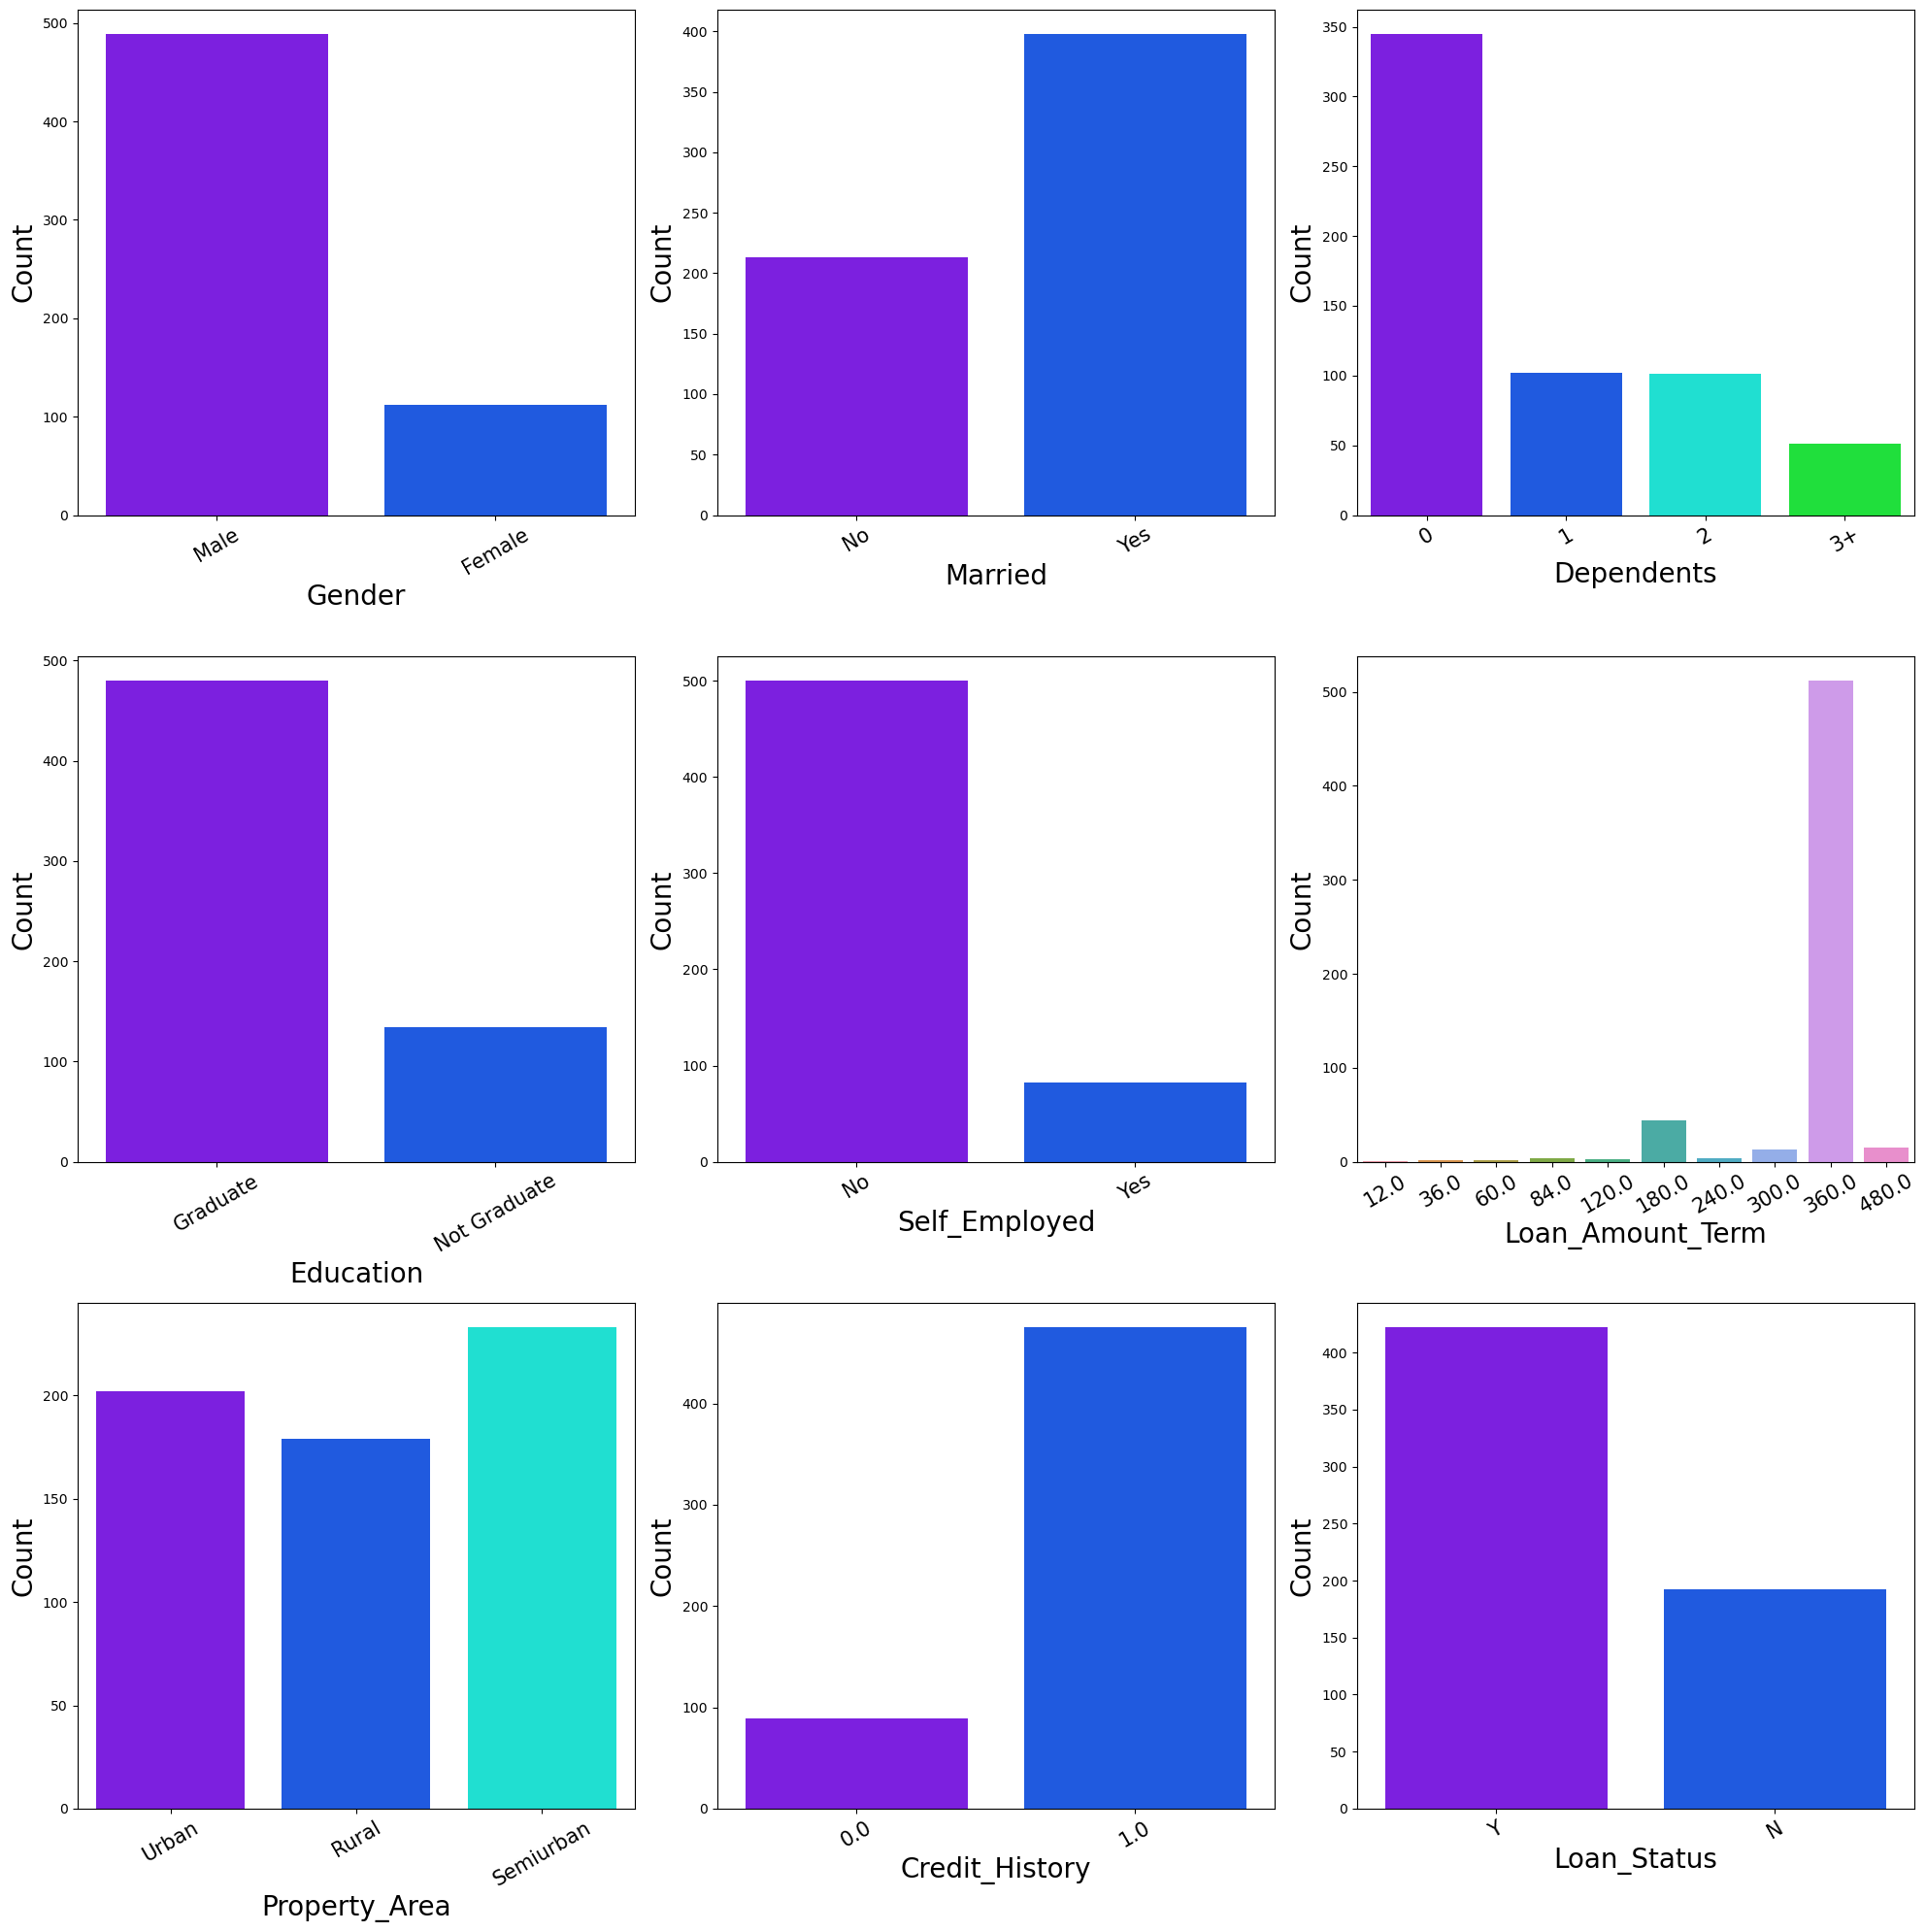

In [16]:
#countplot for each of above to check data 
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for column in category:
    if plotnumber <= len(category):
        ax = plt.subplot(3, 3, plotnumber)  # Adjust the subplot grid as needed
        sns.countplot(data=df, x=column, ax=ax)
        plt.xlabel(column, fontsize=20)
        plt.xticks(rotation=30, fontsize=15)
        plt.ylabel('Count', fontsize=20)
        plotnumber += 1

# Adjust the layout
plt.tight_layout()

we can see different categorical data in different columns

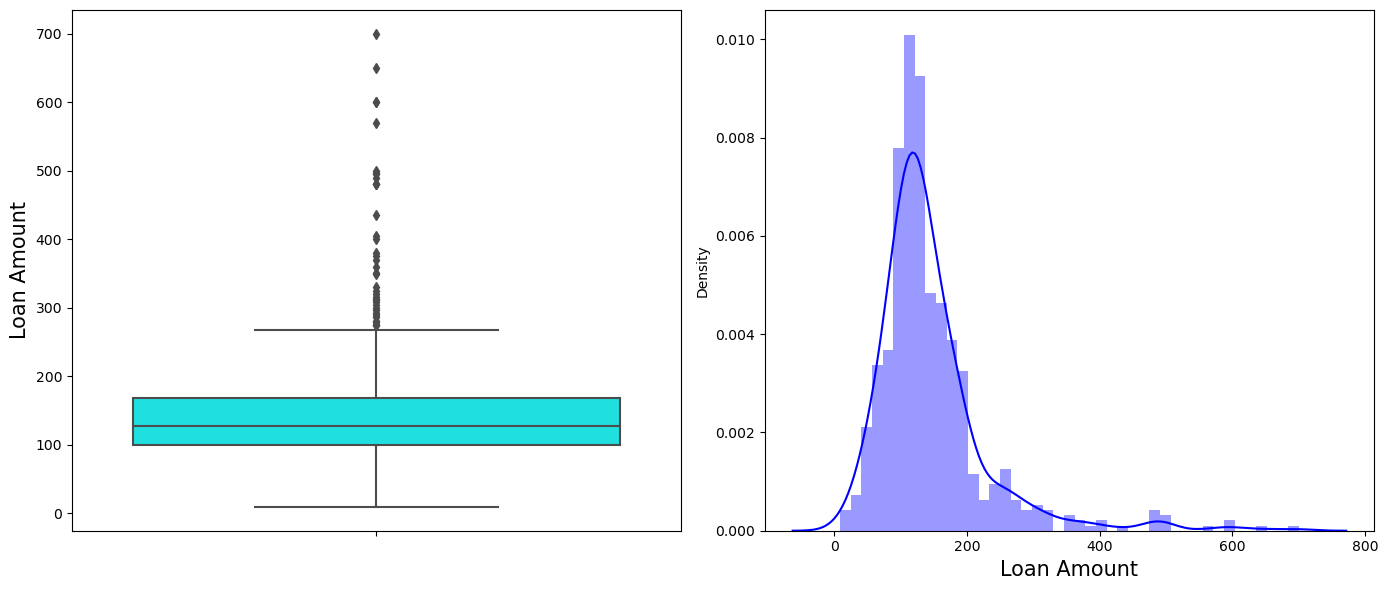

In [17]:
#outliers by missing values
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='LoanAmount', data=df,color='cyan')
plt.ylabel('Loan Amount',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['LoanAmount'], color='b')
plt.xlabel('Loan Amount',fontsize=15)
plt.tight_layout()
plt.show()

In [18]:
print("Mean of Loan Amount:",df['LoanAmount'].mean())
print("Median of Loan Amount:",df['LoanAmount'].median())

Mean of Loan Amount: 146.41216216216216
Median of Loan Amount: 128.0


Here mean is more than median in loan amount We will put median in loan amount as it is important column

In [19]:
# replace missing values
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Imputation of Numerical features
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [20]:
#check the missing values again
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Loan_ID                         0             0.0
Gender                          0             0.0
Married                         0             0.0
Dependents                      0             0.0
Education                       0             0.0
Self_Employed                   0             0.0
ApplicantIncome                 0             0.0
CoapplicantIncome               0             0.0
LoanAmount                      0             0.0
Loan_Amount_Term                0             0.0
Credit_History                  0             0.0
Property_Area                   0             0.0
Loan_Status                     0             0.0


Now we have whole data and we are having no nulls data is good to go

In [21]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [27]:
# check target variables with other variables dependent
pd.crosstab([df['Gender'],df['Married']],[df.Loan_Status],margins=True)

Loan_Status       N    Y  All
Gender Married               
Female No        29   51   80
       Yes        8   24   32
Male   No        50   83  133
       Yes      105  264  369
All             192  422  614

In [28]:
pd.crosstab([df['Dependents']],[df.Loan_Status,df['Gender']],margins=True)

Loan_Status      N           Y       All
Gender      Female Male Female Male     
Dependents                              
0               27   86     56  191  360
1                6   30     13   53  102
2                2   23      5   71  101
3+               2   16      1   32   51
All             37  155     75  347  614

In [29]:
pd.crosstab([df['Education'],df['Gender']],[df.Loan_Status],margins=True)

Loan_Status            N    Y  All
Education    Gender               
Graduate     Female   31   61   92
             Male    109  279  388
Not Graduate Female    6   14   20
             Male     46   68  114
All                  192  422  614

In [30]:
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


1. Outliers Detection and Removal

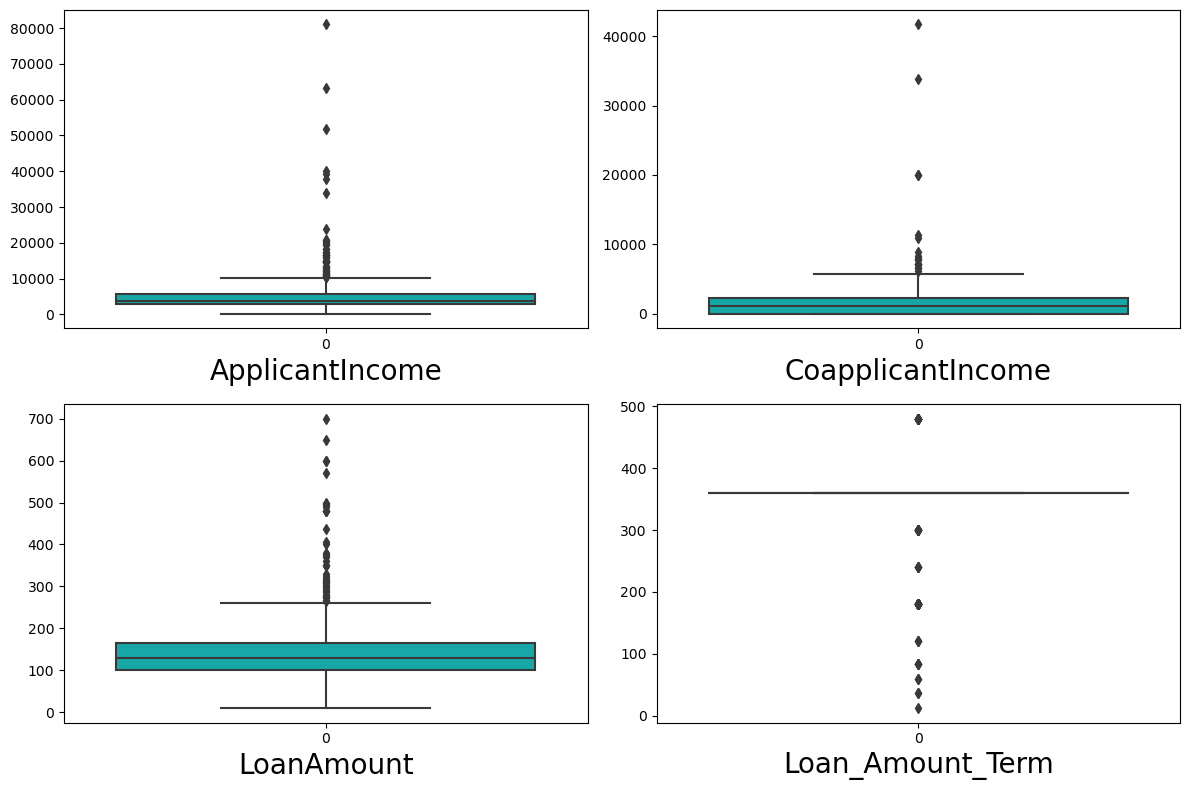

In [31]:
Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [32]:
# Droping unnecessary columns
df.drop(["Loan_ID"], axis=1, inplace=True)

In [33]:
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'] =pd.to_numeric(df['Dependents'])

In [34]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)
Percentage of data loss post outlier removal:  6.026058631921824


In [35]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((614-577)/614)*100,'%')


Percentage Data Loss : 6.026058631921824 %


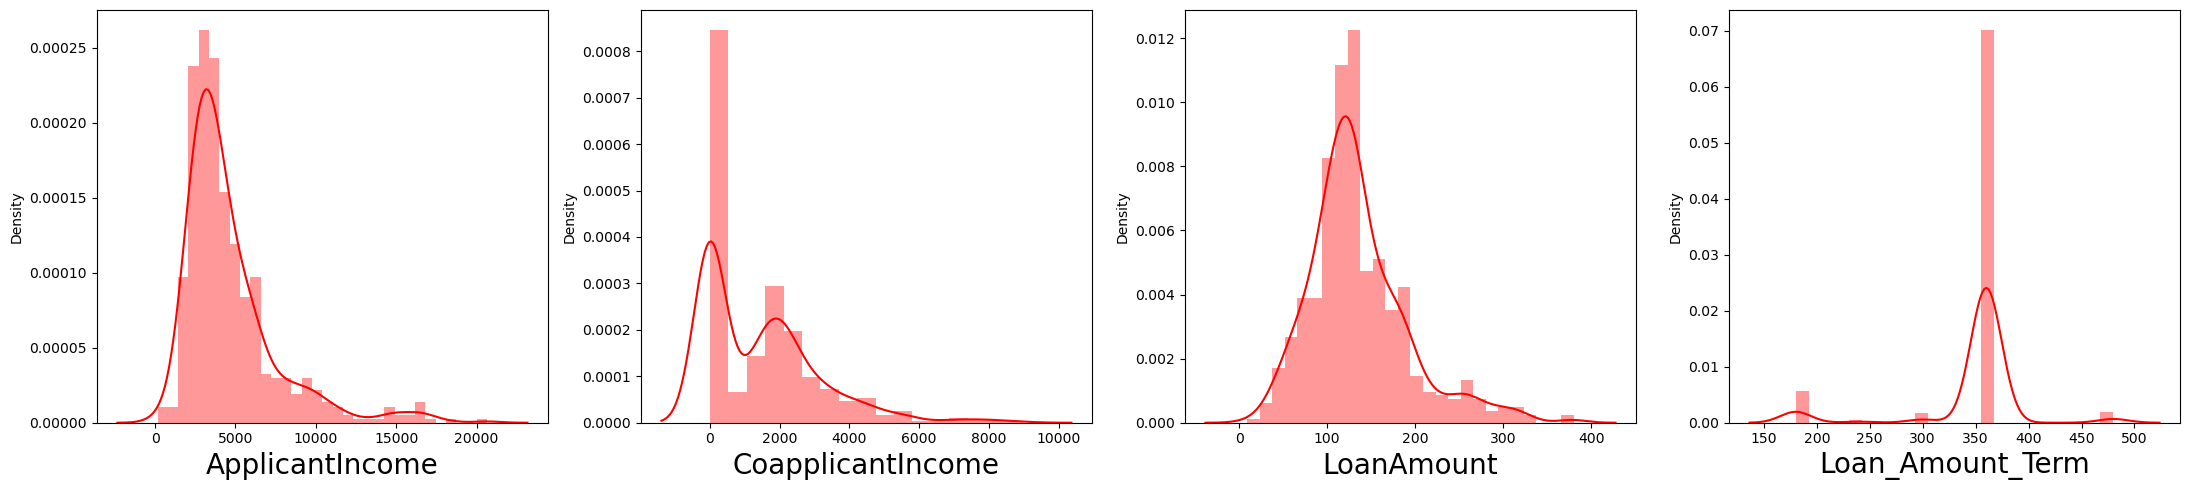

In [36]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [37]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [38]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [39]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


In [40]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [41]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


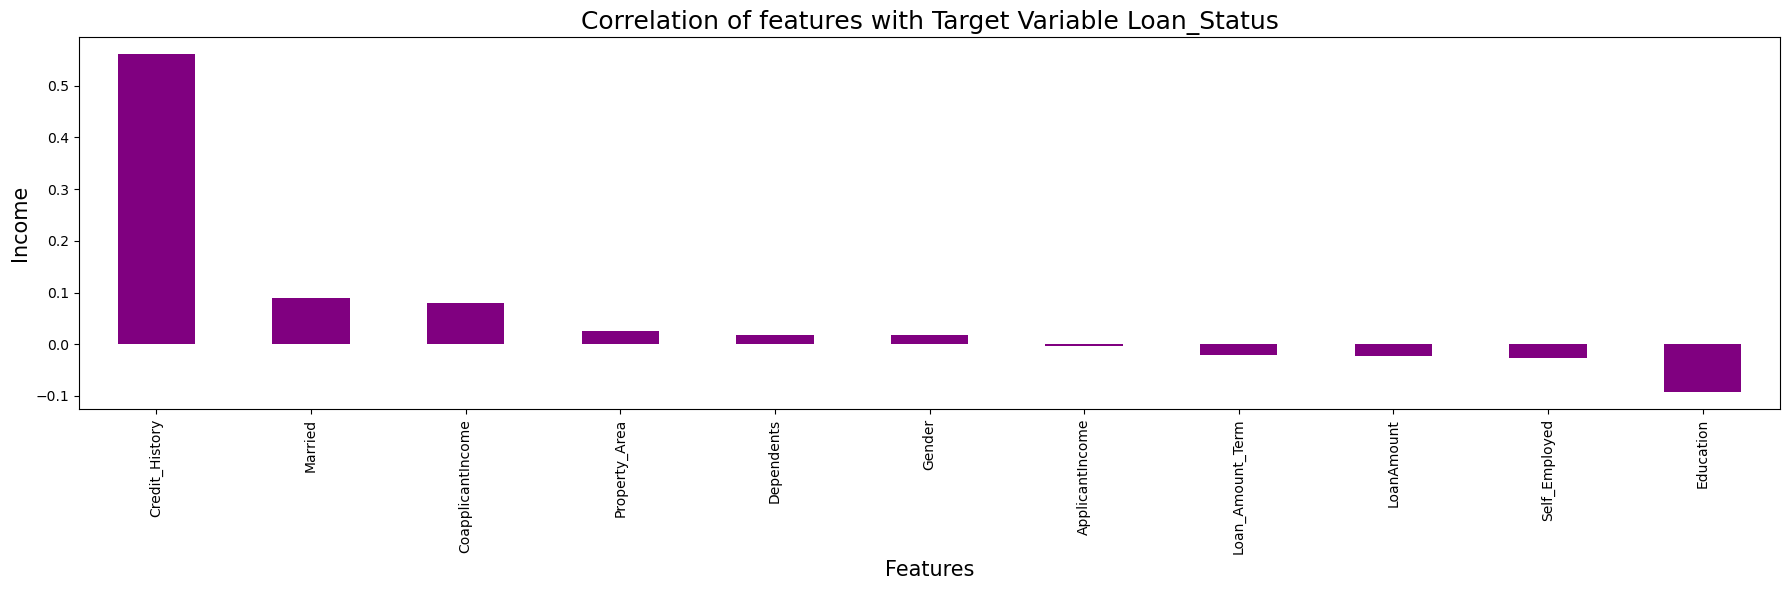

In [42]:
plt.figure(figsize = (18,6))
df.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Loan_Status',fontsize = 18)
plt.show()

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,6.119789,Gender
1,3.963538,Married
2,1.778377,Dependents
3,1.355469,Education
4,1.197219,Self_Employed
5,1.756726,ApplicantIncome
6,1.596438,CoapplicantIncome
7,1.548450,LoanAmount
8,10.415255,Loan_Amount_Term
9,9.483180,Credit_History


In [45]:
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']

In [46]:
Y.value_counts()

Loan_Status
1    398
0    179
Name: count, dtype: int64

In [48]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [49]:
#Machine Learning Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score


In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (403, 11)
Training target vector size: (403,)
Test feature matrix size: (174, 11)
Test target vector size: (174,)


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8850574712643678 on Random_state 12


In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=78, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))


Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8333333333333334


Confusion matrix of Logistics Regression : 
 [[ 22  28]
 [  1 123]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.96      0.44      0.60        50
           1       0.81      0.99      0.89       124

    accuracy                           0.83       174
   macro avg       0.89      0.72      0.75       174
weighted avg       0.86      0.83      0.81       174



In [53]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.59209349991676
RMSE value for k=  2 is: 0.5872202195147035
RMSE value for k=  3 is: 0.44849685092245223
RMSE value for k=  4 is: 0.5028653529707439
RMSE value for k=  5 is: 0.4288450139351179
RMSE value for k=  6 is: 0.4420433223684922
RMSE value for k=  7 is: 0.42209112705697793
RMSE value for k=  8 is: 0.4288450139351179
RMSE value for k=  9 is: 0.4288450139351179
RMSE value for k=  10 is: 0.42209112705697793
RMSE value for k=  11 is: 0.4288450139351179
RMSE value for k=  12 is: 0.42209112705697793
RMSE value for k=  13 is: 0.4288450139351179
RMSE value for k=  14 is: 0.42209112705697793
RMSE value for k=  15 is: 0.42209112705697793
RMSE value for k=  16 is: 0.41522739926869984
RMSE value for k=  17 is: 0.41522739926869984
RMSE value for k=  18 is: 0.408248290463863
RMSE value for k=  19 is: 0.41522739926869984
RMSE value for k=  20 is: 0.41522739926869984
RMSE value for k=  21 is: 0.41522739926869984
RMSE value for k=  22 is: 0.41522739926869984
RMSE value

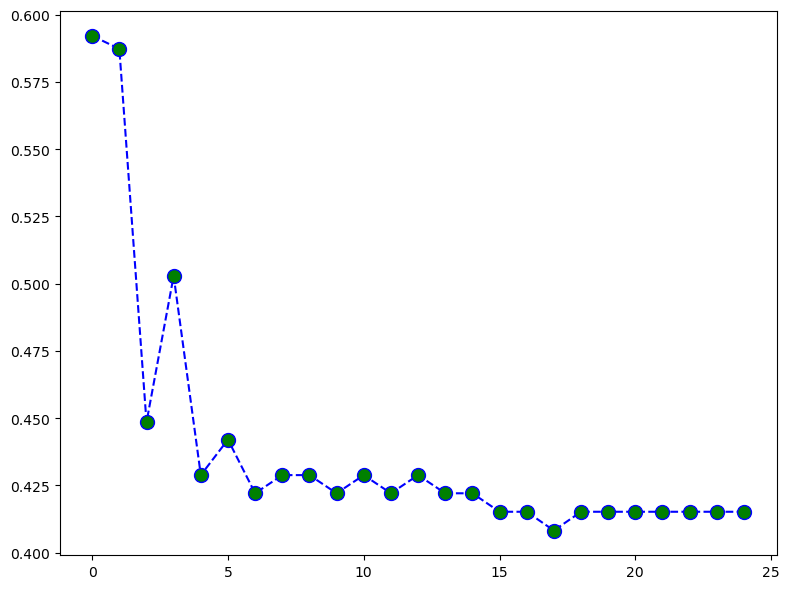

In [54]:
plt.figure(figsize = (8,6))
plt.plot(range(25), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)


Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8390804597701149


Confusion matrix : 
 [[ 23  27]
 [  1 123]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.46      0.62        50
           1       0.82      0.99      0.90       124

    accuracy                           0.84       174
   macro avg       0.89      0.73      0.76       174
weighted avg       0.86      0.84      0.82       174





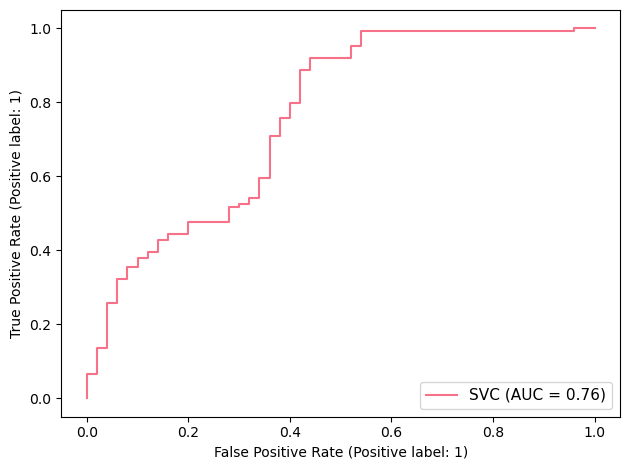

Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.8333333333333334


Confusion matrix : 
 [[ 22  28]
 [  1 123]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.44      0.60        50
           1       0.81      0.99      0.89       124

    accuracy                           0.83       174
   macro avg       0.89      0.72      0.75       174
weighted avg       0.86      0.83      0.81       174





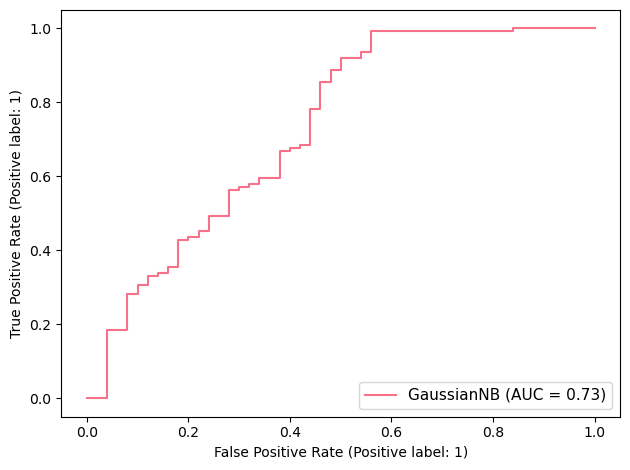

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.7298850574712644


Confusion matrix : 
 [[29 21]
 [26 98]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.53      0.58      0.55        50
           1       0.82      0.79      0.81       124

    accuracy                           0.73       174
   macro avg       0.68      0.69      0.68       174
weighted avg       0.74      0.73      0.73       174





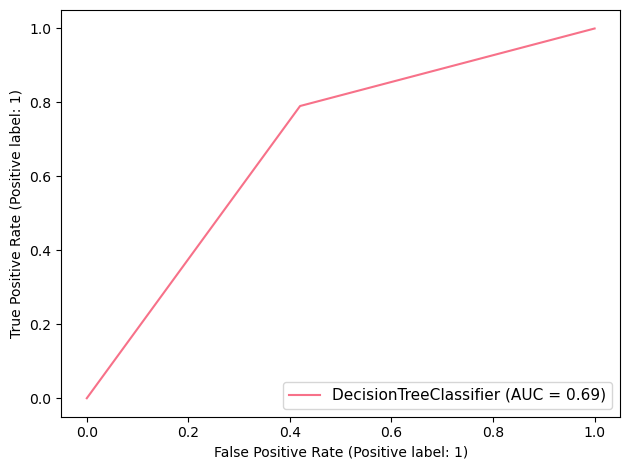

Classification ML Algorithm Evaluation Matrix KNeighborsClassifier(n_neighbors=3) is


Accuracy Score :
 0.7988505747126436


Confusion matrix : 
 [[ 22  28]
 [  7 117]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.44      0.56        50
           1       0.81      0.94      0.87       124

    accuracy                           0.80       174
   macro avg       0.78      0.69      0.71       174
weighted avg       0.79      0.80      0.78       174





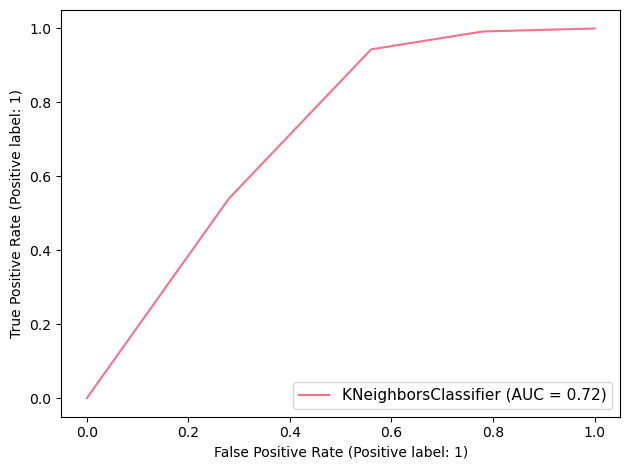

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy Score :
 0.7931034482758621


Confusion matrix : 
 [[ 26  24]
 [ 12 112]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.68      0.52      0.59        50
           1       0.82      0.90      0.86       124

    accuracy                           0.79       174
   macro avg       0.75      0.71      0.73       174
weighted avg       0.78      0.79      0.78       174





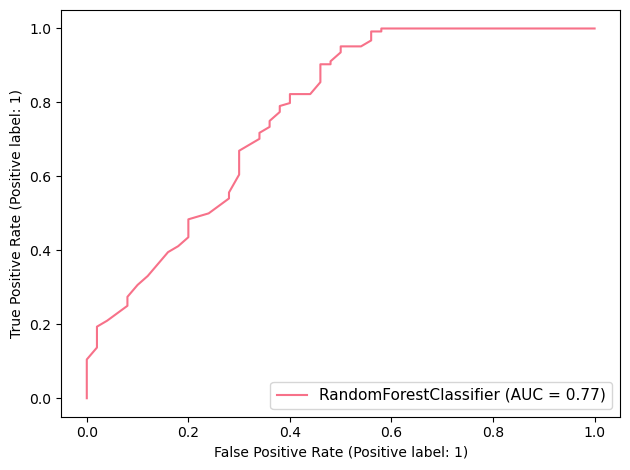

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.7758620689655172


Confusion matrix : 
 [[ 26  24]
 [ 15 109]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.63      0.52      0.57        50
           1       0.82      0.88      0.85       124

    accuracy                           0.78       174
   macro avg       0.73      0.70      0.71       174
weighted avg       0.77      0.78      0.77       174





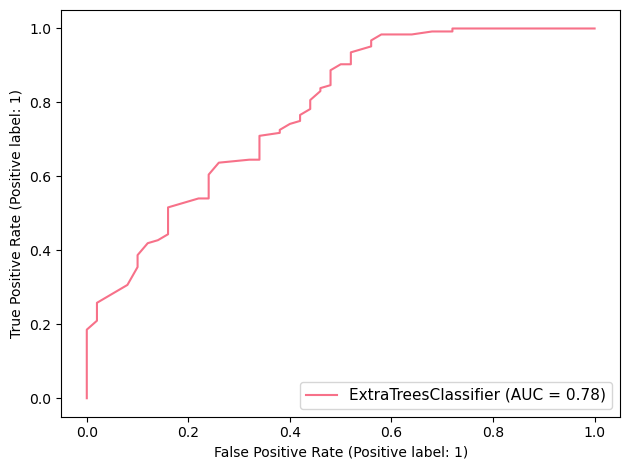

In [58]:
from sklearn.metrics import RocCurveDisplay
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    RocCurveDisplay.from_estimator(m, X_test, Y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()
    print('=====================================================================')

In [59]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('==============================================================')



Cross Validation Score LogisticRegression() :

Score : [0.81034483 0.79310345 0.79130435 0.86086957 0.83478261]
Mean Score : 0.8180809595202397
Std deviation : 0.02649724741088433




Cross Validation Score SVC() :

Score : [0.81896552 0.78448276 0.79130435 0.86086957 0.83478261]
Mean Score : 0.8180809595202397
Std deviation : 0.028129764814348753




Cross Validation Score GaussianNB() :

Score : [0.81034483 0.79310345 0.79130435 0.85217391 0.8173913 ]
Mean Score : 0.812863568215892
Std deviation : 0.02203365599787896




Cross Validation Score DecisionTreeClassifier() :

Score : [0.69827586 0.69827586 0.71304348 0.73913043 0.73043478]
Mean Score : 0.715832083958021
Std deviation : 0.01661487366667388




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.75862069 0.76724138 0.71304348 0.79130435 0.72173913]
Mean Score : 0.7503898050974513
Std deviation : 0.029125013674020518




Cross Validation Score RandomForestClassifier() :

Score : [0.78448276 0.77586207 

In [62]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5; 1/16

[CV 3/5; 8/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=5;, score=0.753 total time=   0.0s
[CV 4/5; 8/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=5
[CV 4/5; 8/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=5;, score=0.775 total time=   0.0s
[CV 5/5; 8/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=5
[CV 5/5; 8/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=5;, score=0.750 total time=   0.0s
[CV 1/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 1/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.815 total time=   0.0s
[CV 2/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 2/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, 

[CV 1/5; 18/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=25;, score=nan total time=   0.0s
[CV 2/5; 18/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=25
[CV 2/5; 18/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=25;, score=nan total time=   0.0s
[CV 3/5; 18/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=25
[CV 3/5; 18/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=25;, score=nan total time=   0.0s
[CV 4/5; 18/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=25
[CV 4/5; 18/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=25;, score=nan total time=   0.0s
[CV 5/5; 18/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=25
[CV 5/5; 18/168] END bootstrap=True, criterion=gini,

[CV 2/5; 25/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=25;, score=0.815 total time=   0.0s
[CV 3/5; 25/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=25
[CV 3/5; 25/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=25;, score=0.790 total time=   0.0s
[CV 4/5; 25/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=25
[CV 4/5; 25/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=25;, score=0.750 total time=   0.0s
[CV 5/5; 25/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=25
[CV 5/5; 25/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=25;, score=0.725 total time=   0.0s
[CV 1/5; 26/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=50
[CV 1/5; 26/168] END bootstrap=True, criteri

[CV 4/5; 36/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=5;, score=0.725 total time=   0.0s
[CV 5/5; 36/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=5
[CV 5/5; 36/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=5;, score=0.700 total time=   0.0s
[CV 1/5; 37/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10
[CV 1/5; 37/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10;, score=0.728 total time=   0.0s
[CV 2/5; 37/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10
[CV 2/5; 37/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10;, score=0.790 total time=   0.0s
[CV 3/5; 37/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10
[CV 3/5; 37/168] END bootstrap=True, criterion=

[CV 4/5; 50/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=5;, score=0.762 total time=   0.0s
[CV 5/5; 50/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=5
[CV 5/5; 50/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=5;, score=0.750 total time=   0.0s
[CV 1/5; 51/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=10
[CV 1/5; 51/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=10;, score=0.790 total time=   0.0s
[CV 2/5; 51/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=10
[CV 2/5; 51/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=10;, score=0.716 total time=   0.0s
[CV 3/5; 51/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=10
[CV 3/5; 51/168] END bootstrap=True, criterion=

[CV 5/5; 64/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=5;, score=0.625 total time=   0.0s
[CV 1/5; 65/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=10
[CV 1/5; 65/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=10;, score=0.790 total time=   0.0s
[CV 2/5; 65/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=10
[CV 2/5; 65/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=10;, score=0.790 total time=   0.0s
[CV 3/5; 65/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=10
[CV 3/5; 65/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=10;, score=0.765 total time=   0.0s
[CV 4/5; 65/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=10
[CV 4/5; 65/168] END bootstrap=True, criterio

[CV 3/5; 79/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10;, score=0.728 total time=   0.0s
[CV 4/5; 79/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10
[CV 4/5; 79/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10;, score=0.675 total time=   0.0s
[CV 5/5; 79/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10
[CV 5/5; 79/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10;, score=0.725 total time=   0.0s
[CV 1/5; 80/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15
[CV 1/5; 80/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=0.790 total time=   0.0s
[CV 2/5; 80/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15
[CV 2/5; 80/168] END bootstrap=True, criteri

[CV 4/5; 93/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=10;, score=0.775 total time=   0.0s
[CV 5/5; 93/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=10
[CV 5/5; 93/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=10;, score=0.775 total time=   0.0s
[CV 1/5; 94/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15
[CV 1/5; 94/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.852 total time=   0.0s
[CV 2/5; 94/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15
[CV 2/5; 94/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.840 total time=   0.0s
[CV 3/5; 94/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15
[CV 3/5; 94/168] END bootstr

[CV 1/5; 107/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=10;, score=0.815 total time=   0.0s
[CV 2/5; 107/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=10
[CV 2/5; 107/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=10;, score=0.802 total time=   0.0s
[CV 3/5; 107/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=10
[CV 3/5; 107/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=10;, score=0.778 total time=   0.0s
[CV 4/5; 107/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=10
[CV 4/5; 107/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=10;, score=0.725 total time=   0.0s
[CV 5/5; 107/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=10
[CV 5/5; 107

[CV 1/5; 121/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.790 total time=   0.0s
[CV 2/5; 121/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10
[CV 2/5; 121/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.741 total time=   0.0s
[CV 3/5; 121/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10
[CV 3/5; 121/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.765 total time=   0.0s
[CV 4/5; 121/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10
[CV 4/5; 121/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.738 total time=   0.0s
[CV 5/5; 121/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10
[CV 5/5; 121

[CV 3/5; 135/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10;, score=0.728 total time=   0.0s
[CV 4/5; 135/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10
[CV 4/5; 135/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10;, score=0.738 total time=   0.0s
[CV 5/5; 135/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10
[CV 5/5; 135/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10;, score=0.675 total time=   0.0s
[CV 1/5; 136/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15
[CV 1/5; 136/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15;, score=0.815 total time=   0.0s
[CV 2/5; 136/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15
[CV 2/5; 136

[CV 3/5; 149/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.741 total time=   0.0s
[CV 4/5; 149/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10
[CV 4/5; 149/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.700 total time=   0.0s
[CV 5/5; 149/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10
[CV 5/5; 149/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.588 total time=   0.0s
[CV 1/5; 150/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15
[CV 1/5; 150/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.815 total time=   0.0s
[CV 2/5; 150/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15
[CV 2/5; 150

[CV 2/5; 163/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.852 total time=   0.0s
[CV 3/5; 163/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10
[CV 3/5; 163/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.802 total time=   0.0s
[CV 4/5; 163/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10
[CV 4/5; 163/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.725 total time=   0.0s
[CV 5/5; 163/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10
[CV 5/5; 163/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.675 total time=   0.0s
[CV 1/5; 164/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15
[CV 1/5; 164

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [63]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 60}

In [60]:
#Hyper Parameter Tuning : GridSearchCV
from sklearn.model_selection import GridSearchCV
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

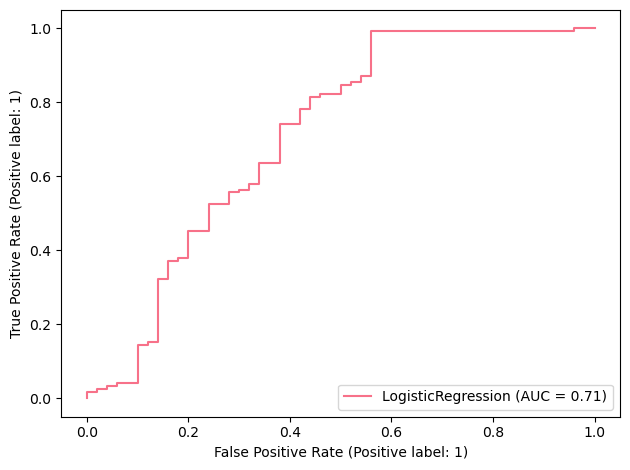

In [65]:
RocCurveDisplay.from_estimator(log_reg, X_test, Y_test)
plt.show()